# Plotting Template — Demonstration

Ce notebook présente l'utilisation complète du module `plotting/` :

1. **Profils de style** (`notebook`, `slides`, `paper`)
2. **`plot_line`** — tracés avec markers blancs + contour couleur
3. **`apply_marker_style`** — restyle de courbes existantes
4. **`save_figure`** — export normal + variante **DECLASSIFIE**
5. **`style_context`** — application temporaire d'un profil
6. **`new_figure`** — création rapide avec profil intégré

> **Principe** : on utilise Matplotlib exactement comme d'habitude.
> La seule différence : un `use_style(...)` au début, et `plot_line` / `save_figure` pour les finitions.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Import du module plotting
from plotting import (
    use_style,
    style_context,
    new_figure,
    save_figure,
    plot_line,
    apply_marker_style,
)

# Données de démonstration
x = np.linspace(0, 2 * np.pi, 25)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_damped = np.exp(-x / 5) * np.sin(2 * x)

---
## 1. Comparaison des 3 profils

Chaque profil ajuste automatiquement : taille de figure, épaisseur des traits, tailles de police, DPI d'export, etc.

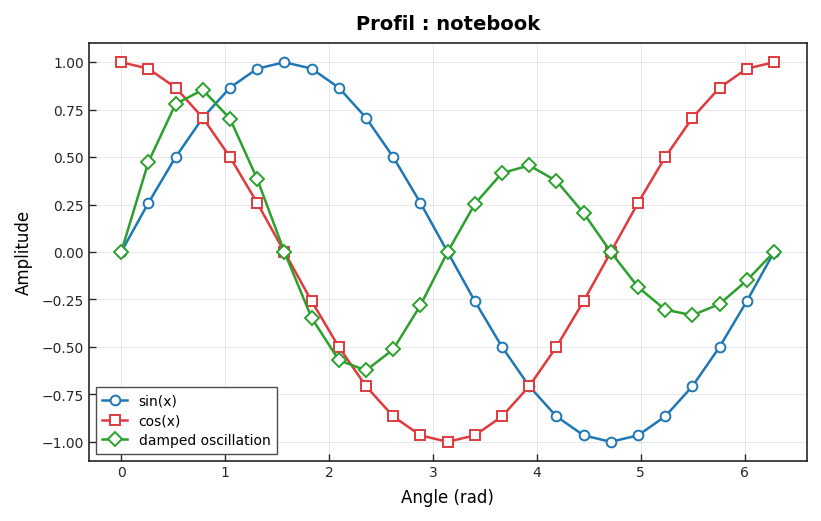

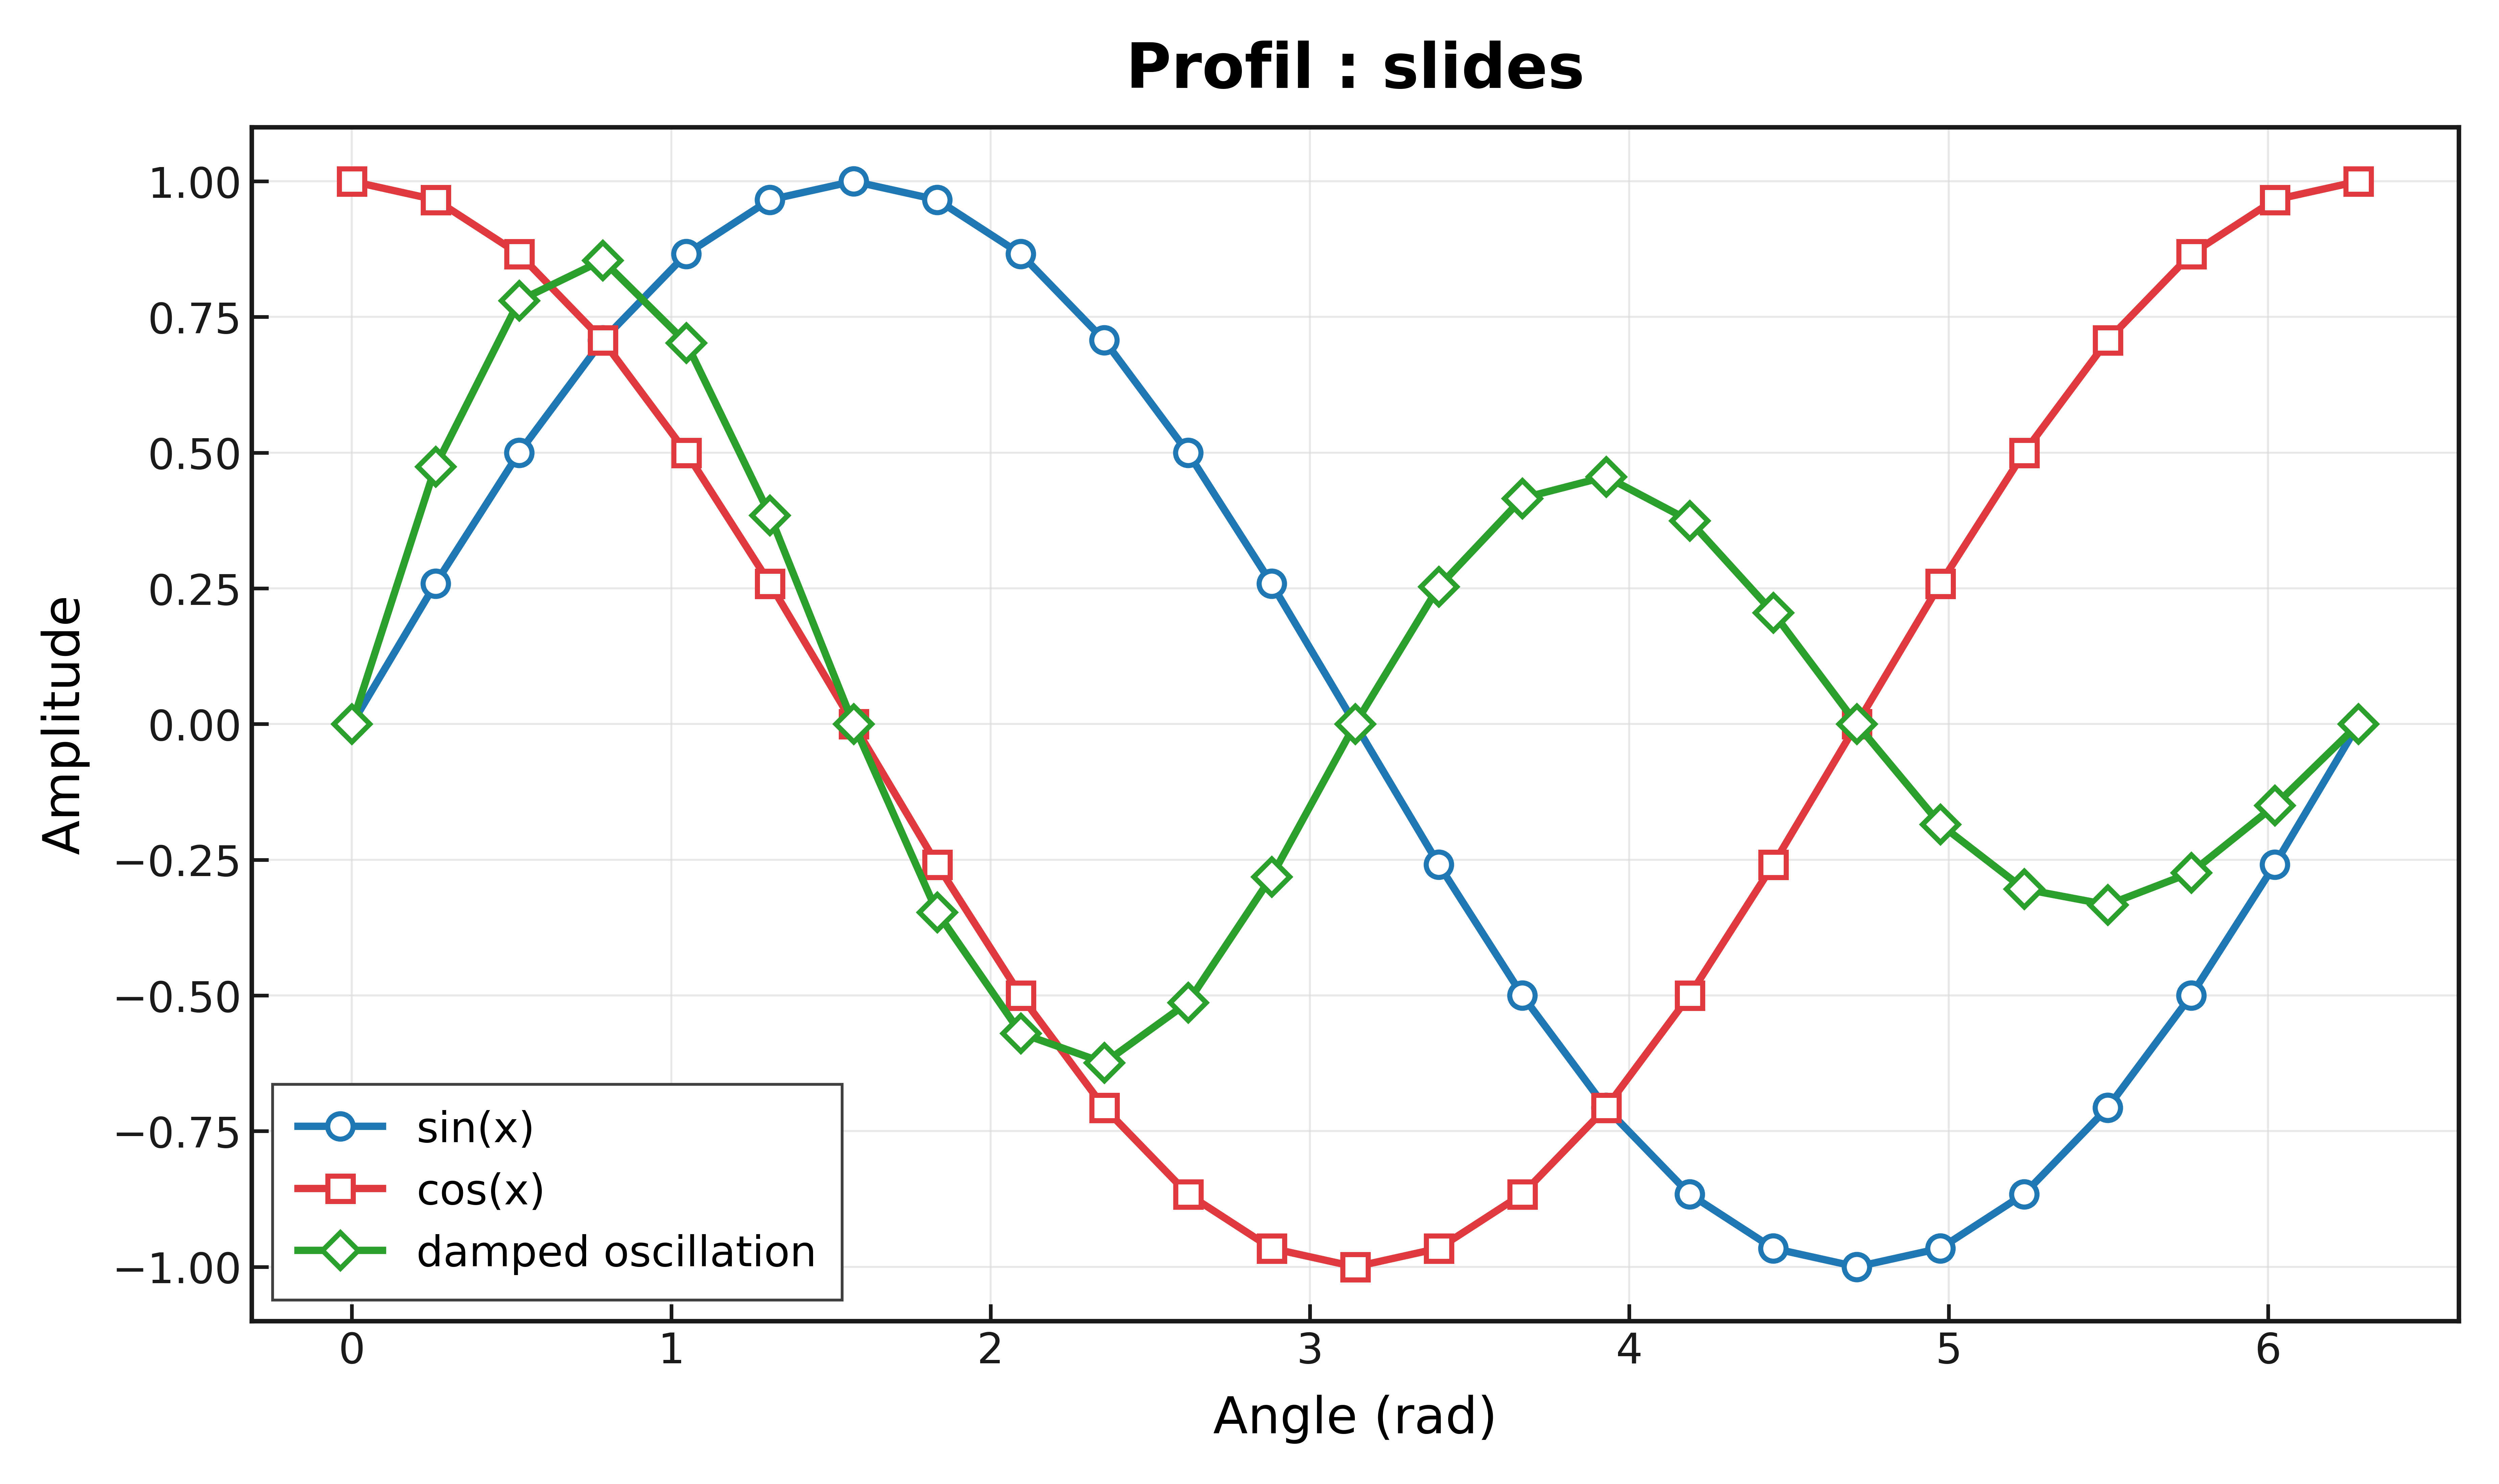

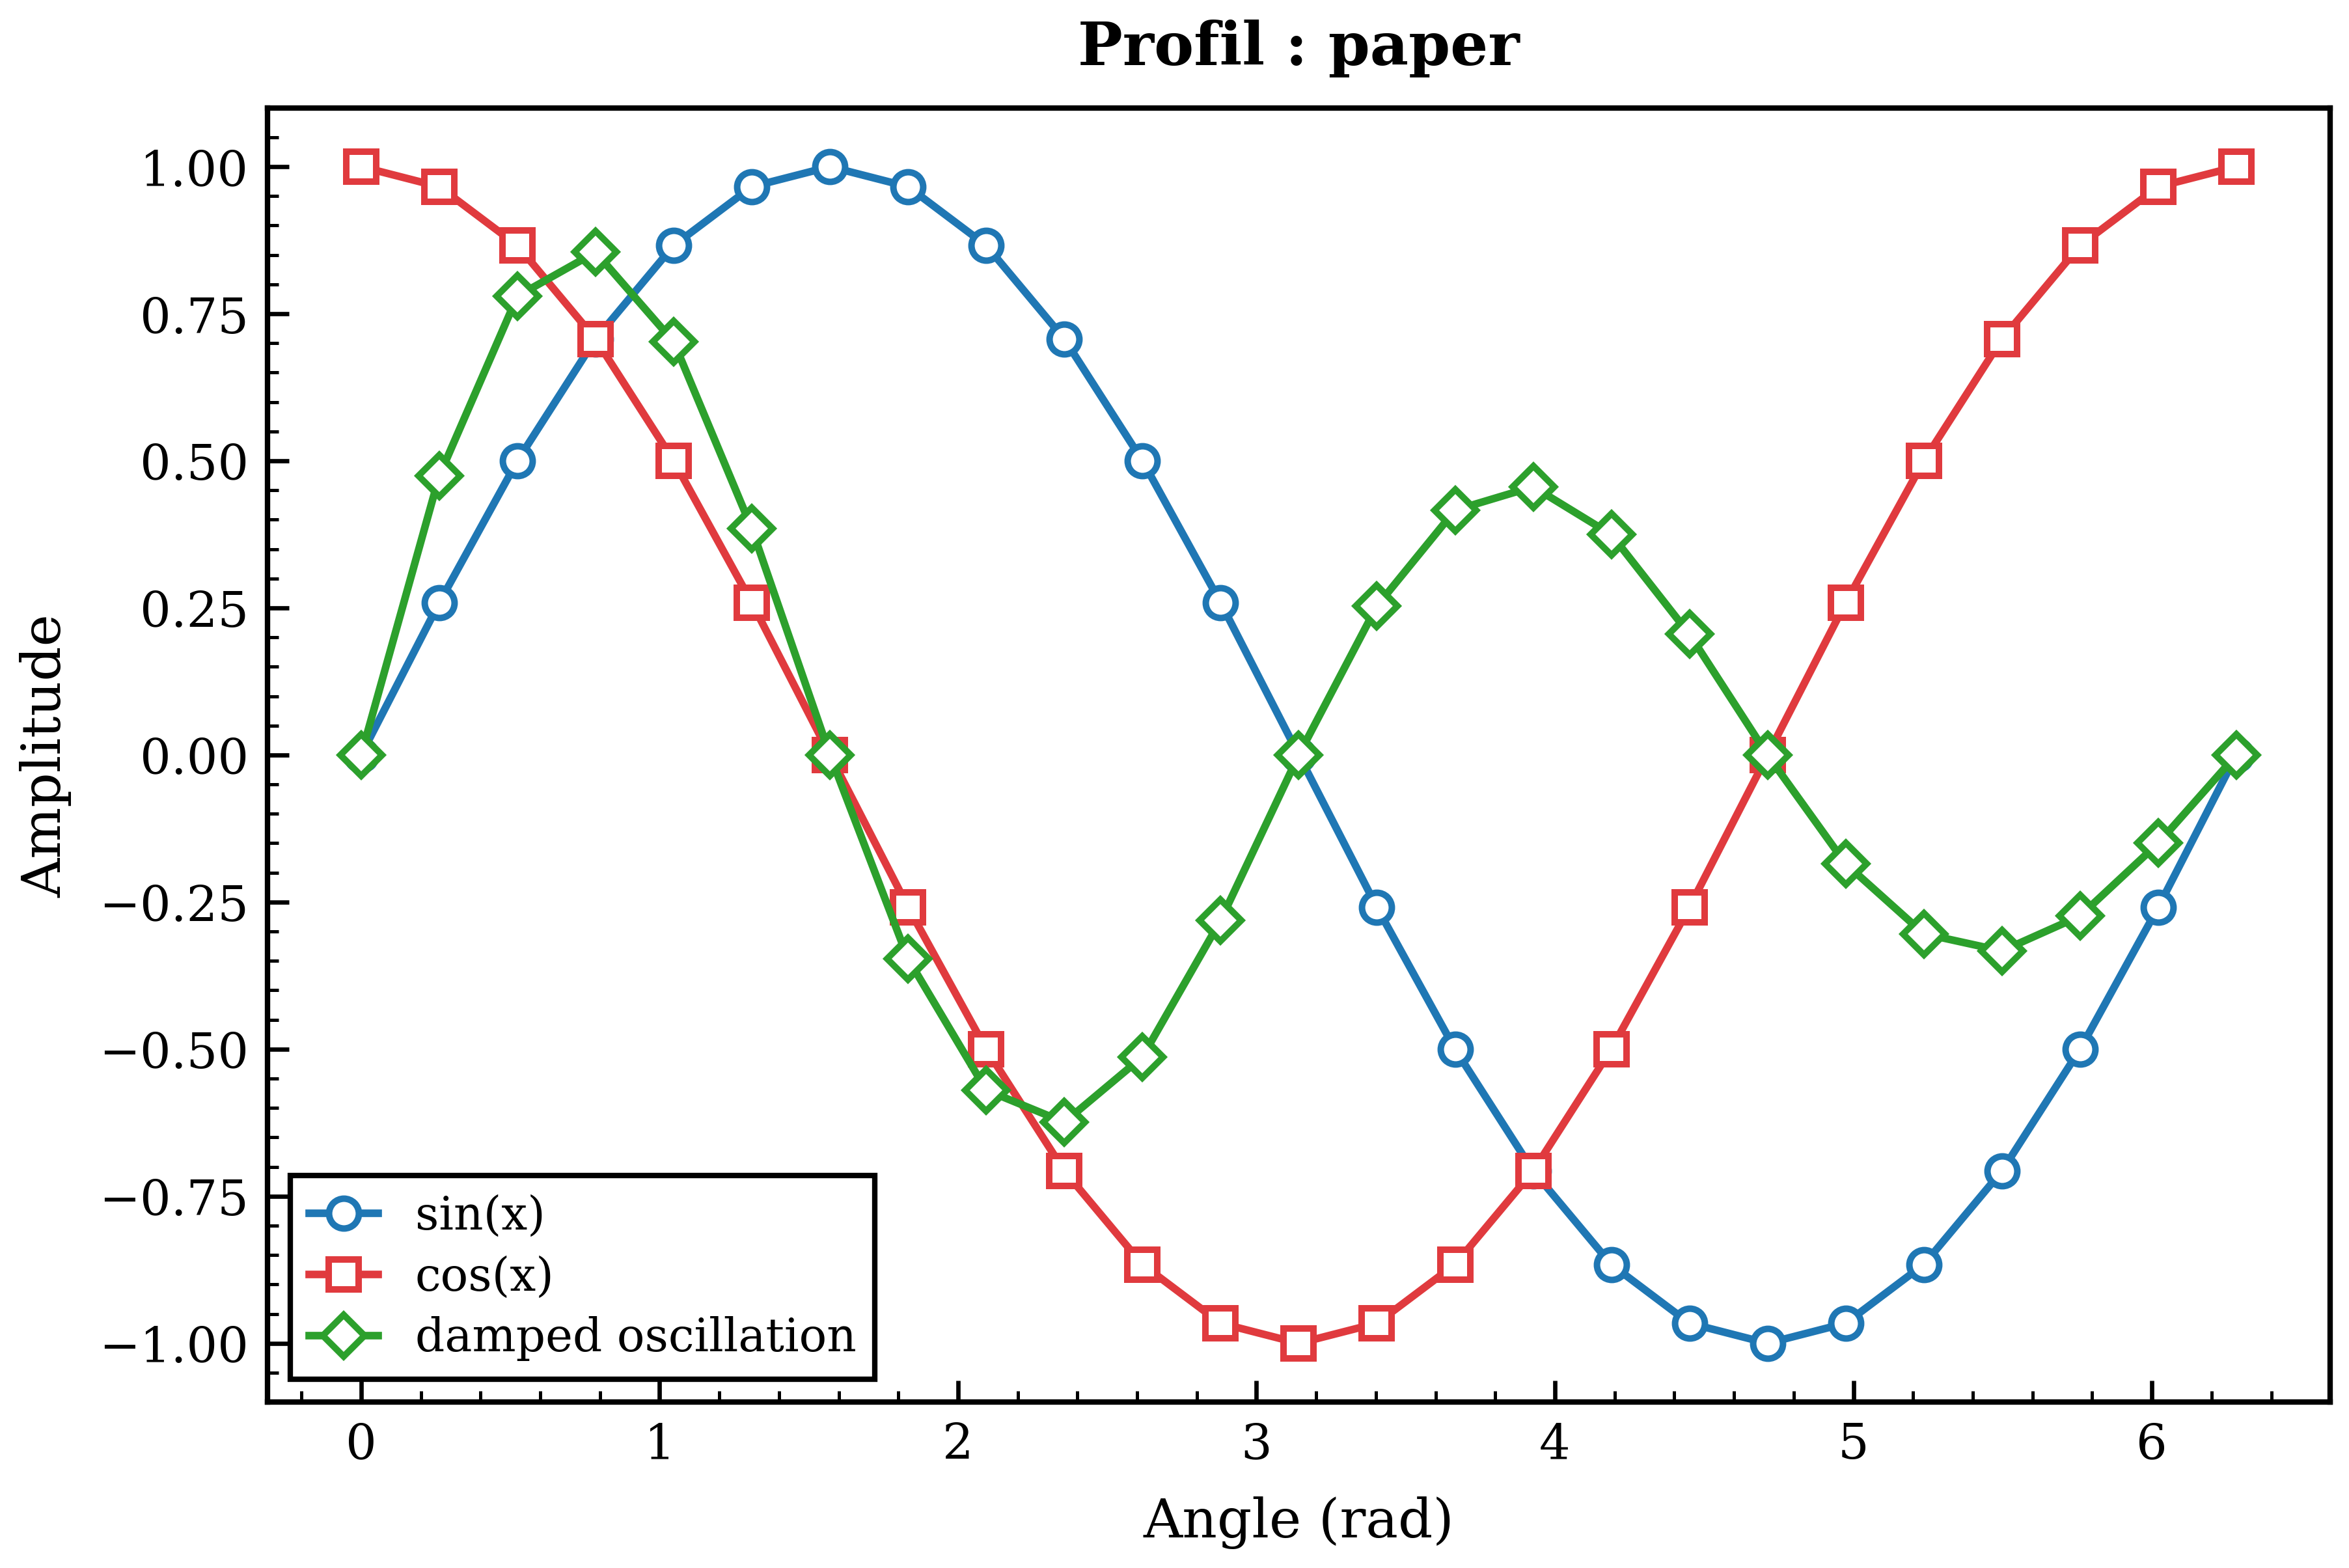

In [34]:
for profile in ["notebook", "slides", "paper"]:
    use_style(profile)

    fig, ax = plt.subplots()
    plot_line(ax, x, y_sin, label="sin(x)")
    plot_line(ax, x, y_cos, marker="s", label="cos(x)")
    plot_line(ax, x, y_damped, marker="D", label="damped oscillation")

    ax.set_xlabel("Angle (rad)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f"Profil : {profile}")
    ax.legend()
    plt.show()

---
## 2. `plot_line` — markers blancs + contour couleur

`plot_line(ax, x, y)` fonctionne exactement comme `ax.plot()` mais applique automatiquement :
- `markerfacecolor = "white"`
- `markeredgecolor` = couleur de la courbe

Tous les kwargs habituels de `ax.plot()` sont supportés (`linestyle`, `marker`, `label`, etc.).

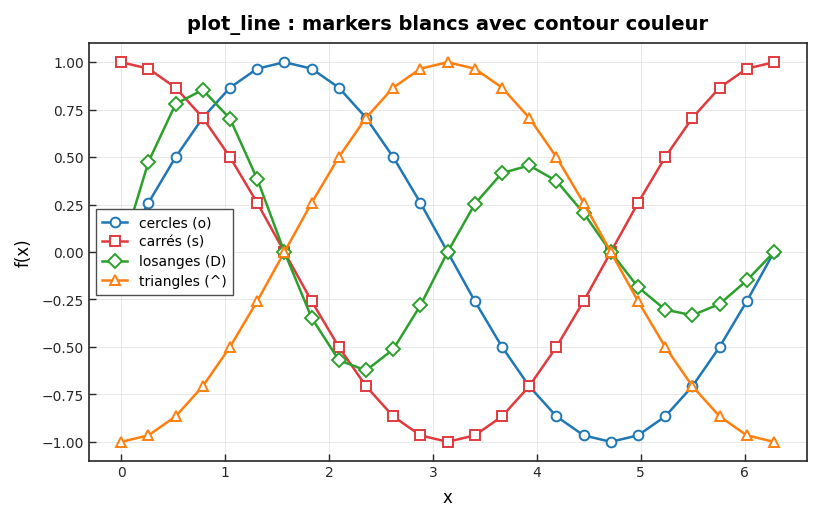

In [35]:
use_style("notebook")

fig, ax = plt.subplots()

# Différents markers — l'intérieur est toujours blanc
plot_line(ax, x, y_sin, marker="o", label="cercles (o)")
plot_line(ax, x, y_cos, marker="s", label="carrés (s)")
plot_line(ax, x, y_damped, marker="D", label="losanges (D)")
plot_line(ax, x, -y_cos, marker="^", label="triangles (^)")

ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("plot_line : markers blancs avec contour couleur")
ax.legend()
plt.show()

---
## 3. `apply_marker_style` — restyle de courbes existantes

Si tu as déjà tracé des courbes avec `ax.plot()` classique, tu peux appliquer le style de markers après coup.

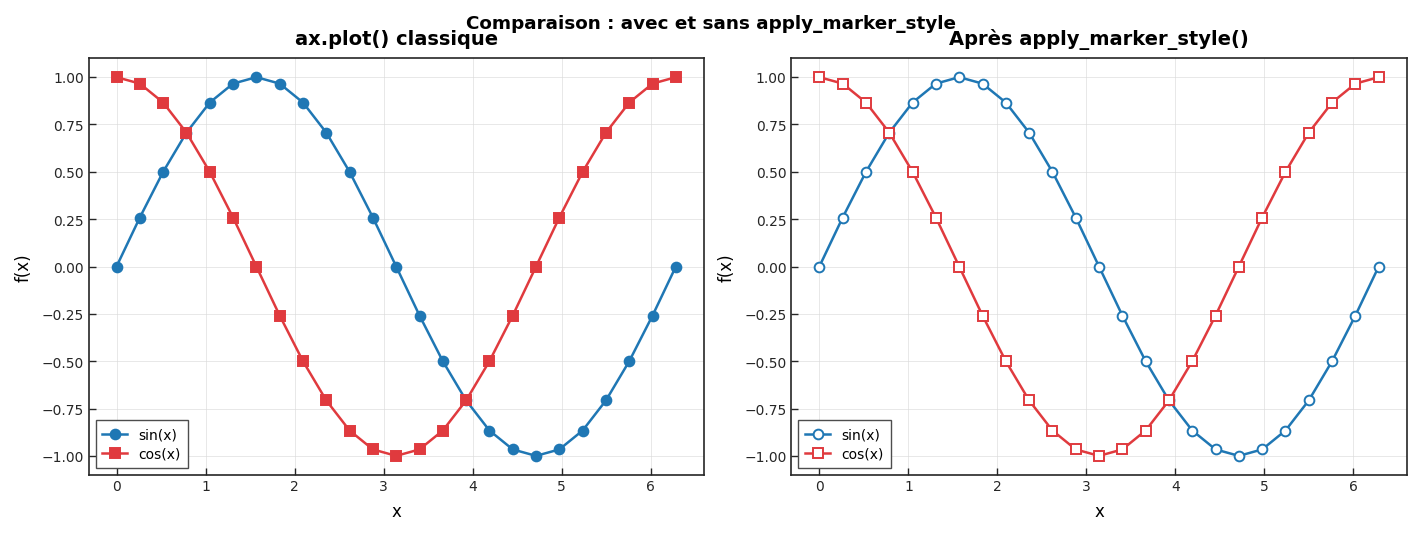

In [36]:
use_style("notebook")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# --- Gauche : ax.plot() classique (markers pleins par défaut) ---
ax1.plot(x, y_sin, "o-", label="sin(x)")
ax1.plot(x, y_cos, "s-", label="cos(x)")
ax1.set_title("ax.plot() classique")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.legend()

# --- Droite : même code, puis apply_marker_style sur chaque ligne ---
line1, = ax2.plot(x, y_sin, "o-", label="sin(x)")
line2, = ax2.plot(x, y_cos, "s-", label="cos(x)")

# Restyle après coup
apply_marker_style(line1)
apply_marker_style(line2)

ax2.set_title("Après apply_marker_style()")
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
ax2.legend()

fig.suptitle("Comparaison : avec et sans apply_marker_style", fontweight="bold", y=1.02)
plt.show()

---
## 4. Export avec `save_figure` — normal + variante DECLASSIFIE

`save_figure()` exporte :
- La figure **normale**
- (optionnel) Une variante **déclassifiée** où les ticks et ticklabels sont retirés sur l'axe choisi

Le paramètre `declassify` accepte :
- `"x"` — retire ticks/ticklabels sur l'axe X uniquement
- `"y"` — retire ticks/ticklabels sur l'axe Y uniquement
- `"both"` — retire sur les deux axes

Les **noms d'axes** (`xlabel`, `ylabel`) sont **conservés**. La mention `DECLASSIFIE` apparaît en gris en bas à gauche.

In [37]:
import os
os.makedirs("demo_output", exist_ok=True)

use_style("notebook")

fig, ax = plt.subplots()
plot_line(ax, x, y_sin, label="sin(x)")
plot_line(ax, x, y_cos, marker="s", label="cos(x)")
ax.set_xlabel("Angle (rad)")
ax.set_ylabel("Amplitude")
ax.set_title("Export avec declassify='both'")
ax.legend()

# Export normal + déclassifié (les deux axes)
files = save_figure(
    fig, "demo_output/exemple_both",
    formats=("png",),
    declassify="both",
)
plt.close(fig)

print("Fichiers générés :")
for f in files:
    print(f"  {f.name:40s}  ({f.stat().st_size / 1024:.1f} kB)")

Fichiers générés :
  exemple_both.png                          (89.5 kB)
  exemple_both_declass_xy.png               (82.1 kB)


### Visualisation côte à côte : normal vs déclassifié

On recharge les PNG exportés pour voir la différence directement dans le notebook.

=== NORMAL ===


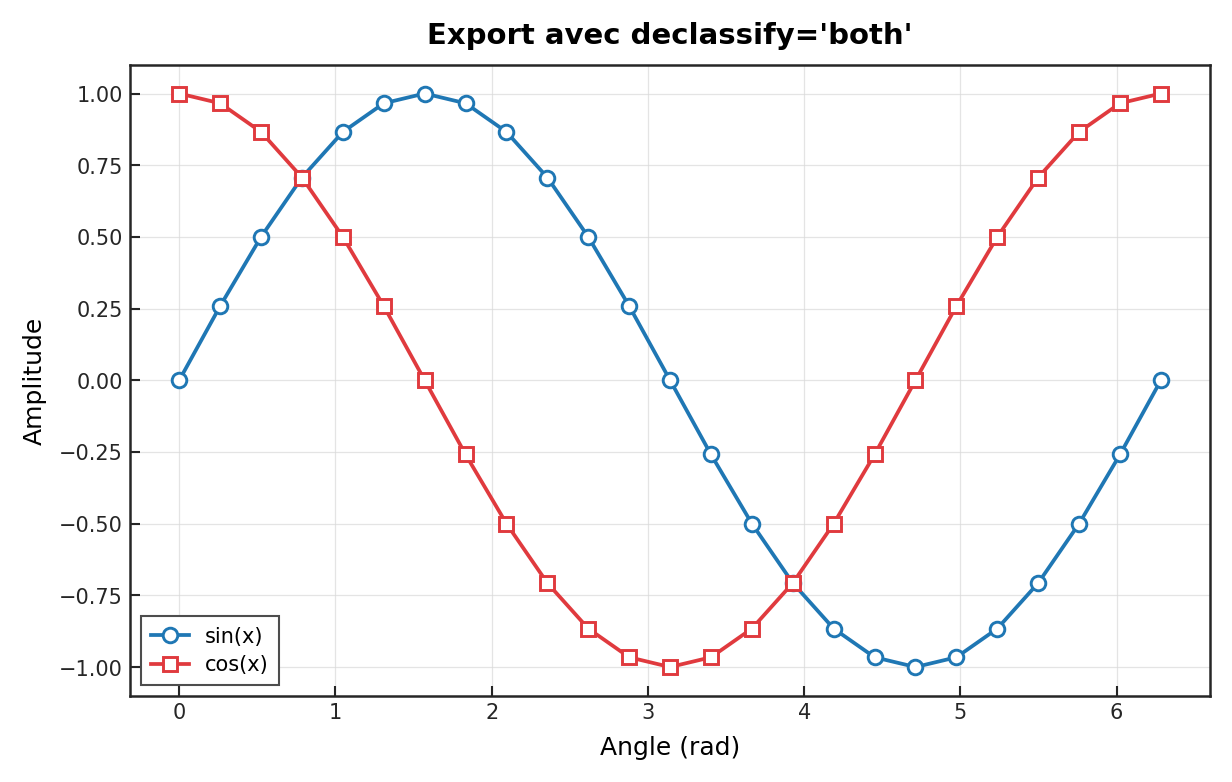


=== DECLASSIFIÉ (both) ===


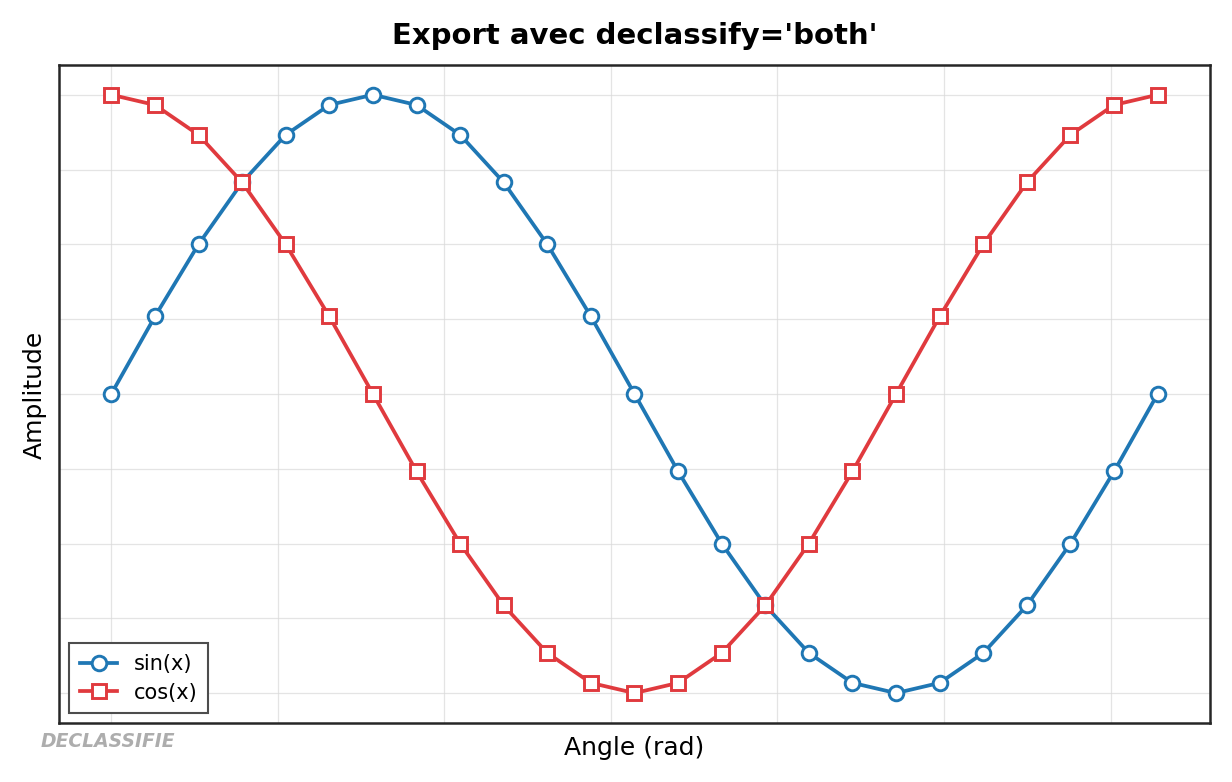

In [38]:
from IPython.display import display, Image as IPImage

print("=== NORMAL ===")
display(IPImage(filename="demo_output/exemple_both.png"))

print("\n=== DECLASSIFIÉ (both) ===")
display(IPImage(filename="demo_output/exemple_both_declass_xy.png"))

### Variantes : declassify sur X seul, Y seul


=== declassify="x" ===


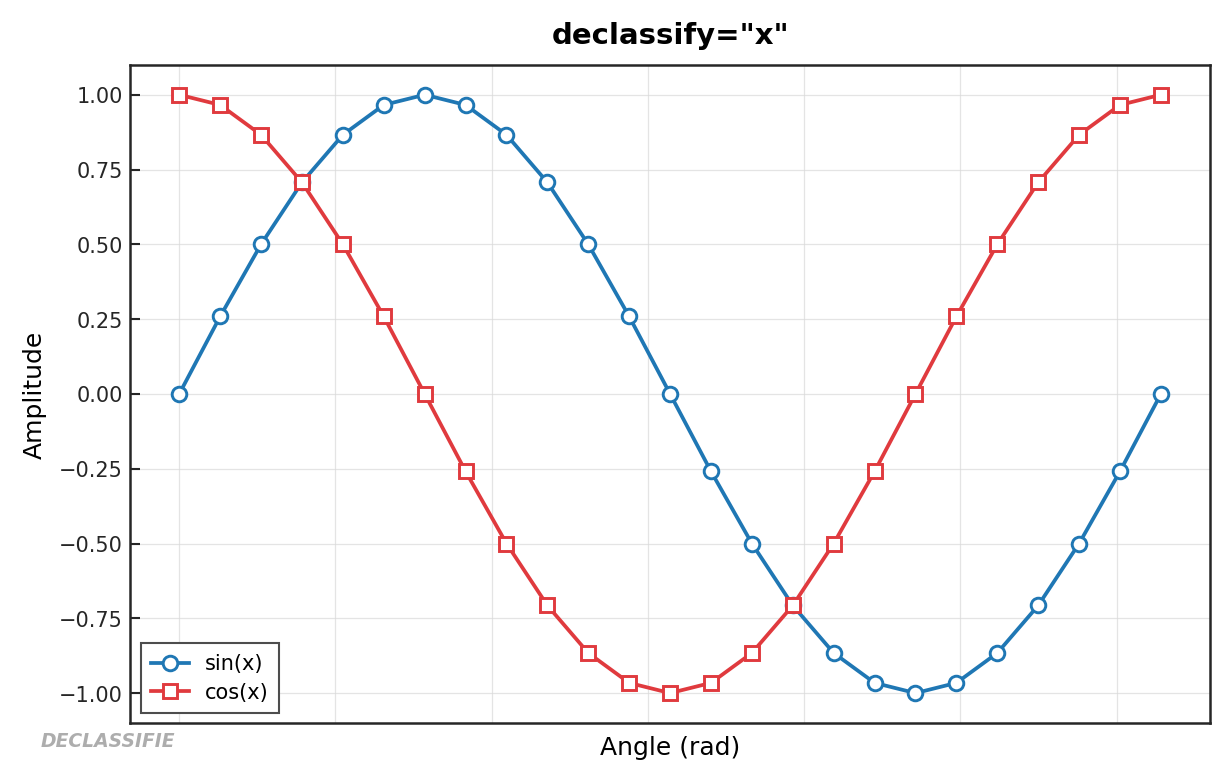


=== declassify="y" ===


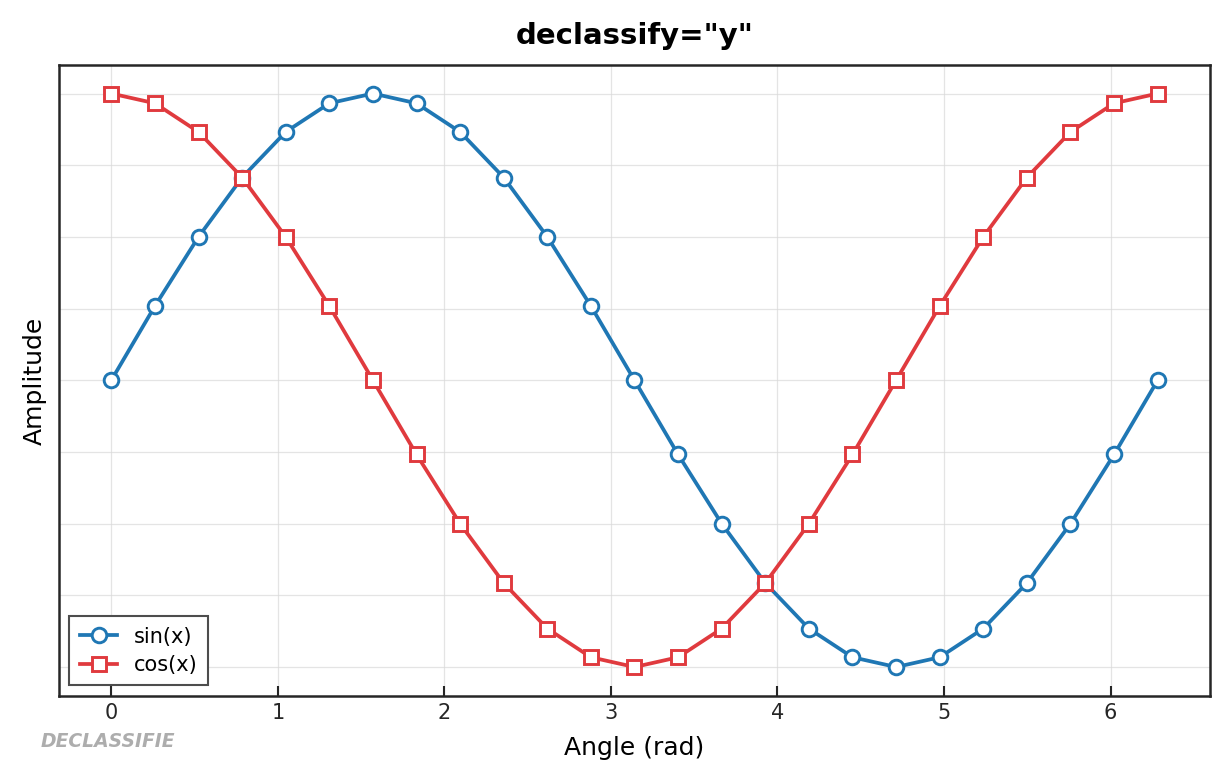


=== declassify="both" ===


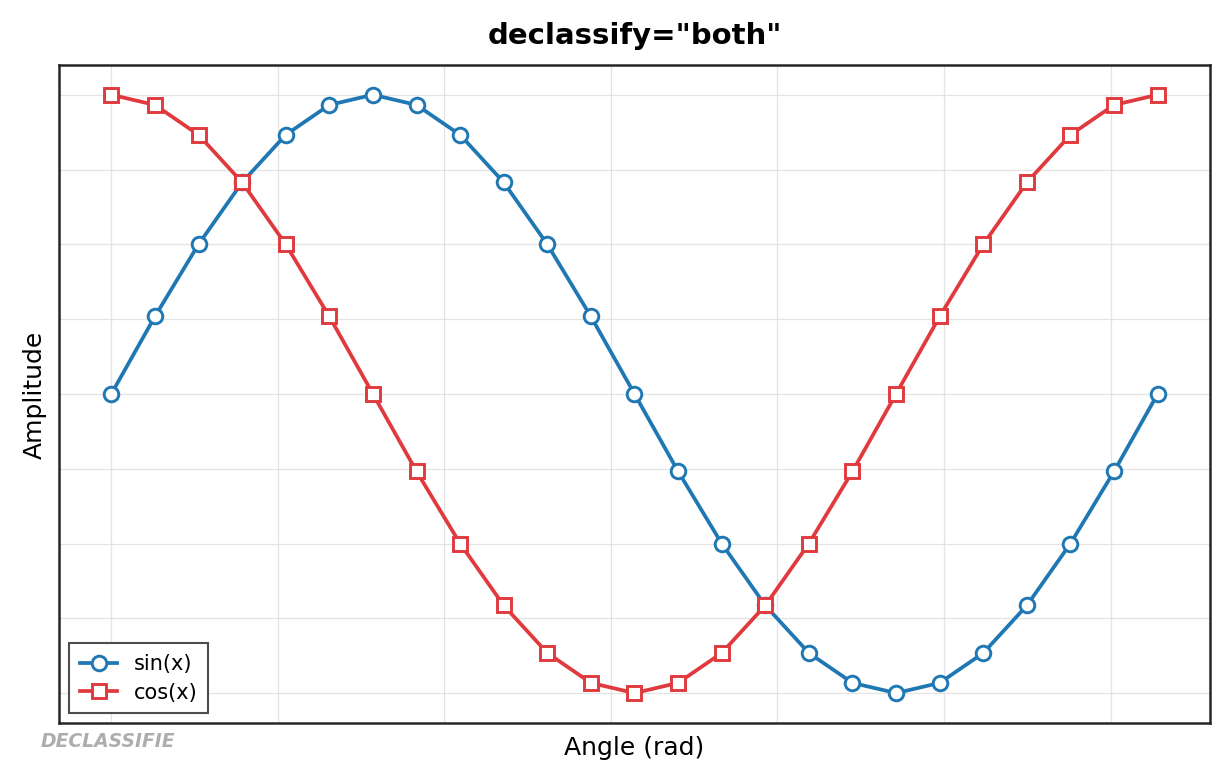

In [39]:
use_style("notebook")

for axis_choice in ["x", "y", "both"]:
    fig, ax = plt.subplots()
    plot_line(ax, x, y_sin, label="sin(x)")
    plot_line(ax, x, y_cos, marker="s", label="cos(x)")
    ax.set_xlabel("Angle (rad)")
    ax.set_ylabel("Amplitude")
    ax.set_title(f'declassify="{axis_choice}"')
    ax.legend()

    save_figure(
        fig, f"demo_output/demo_declass_{axis_choice}",
        formats=("png",),
        declassify=axis_choice,
    )
    plt.close(fig)

# Afficher les variantes déclassifiées
for axis_choice in ["x", "y", "both"]:
    tag = {"x": "x", "y": "y", "both": "xy"}[axis_choice]
    print(f'\n=== declassify="{axis_choice}" ===')
    display(IPImage(filename=f"demo_output/demo_declass_{axis_choice}_declass_{tag}.png"))

---
## 5. `style_context` — profil temporaire

`style_context()` est un context manager : le profil n'est appliqué que dans le bloc `with`. Pratique pour générer une figure "slides" au milieu d'un notebook en profil "notebook".

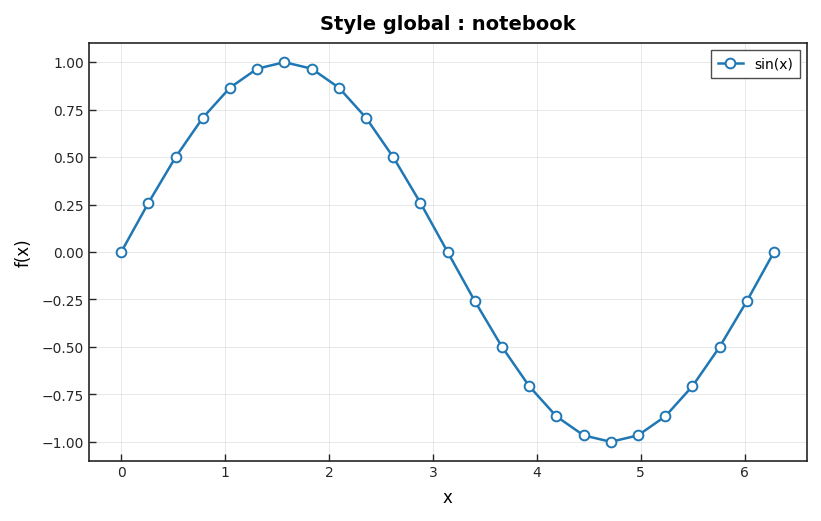

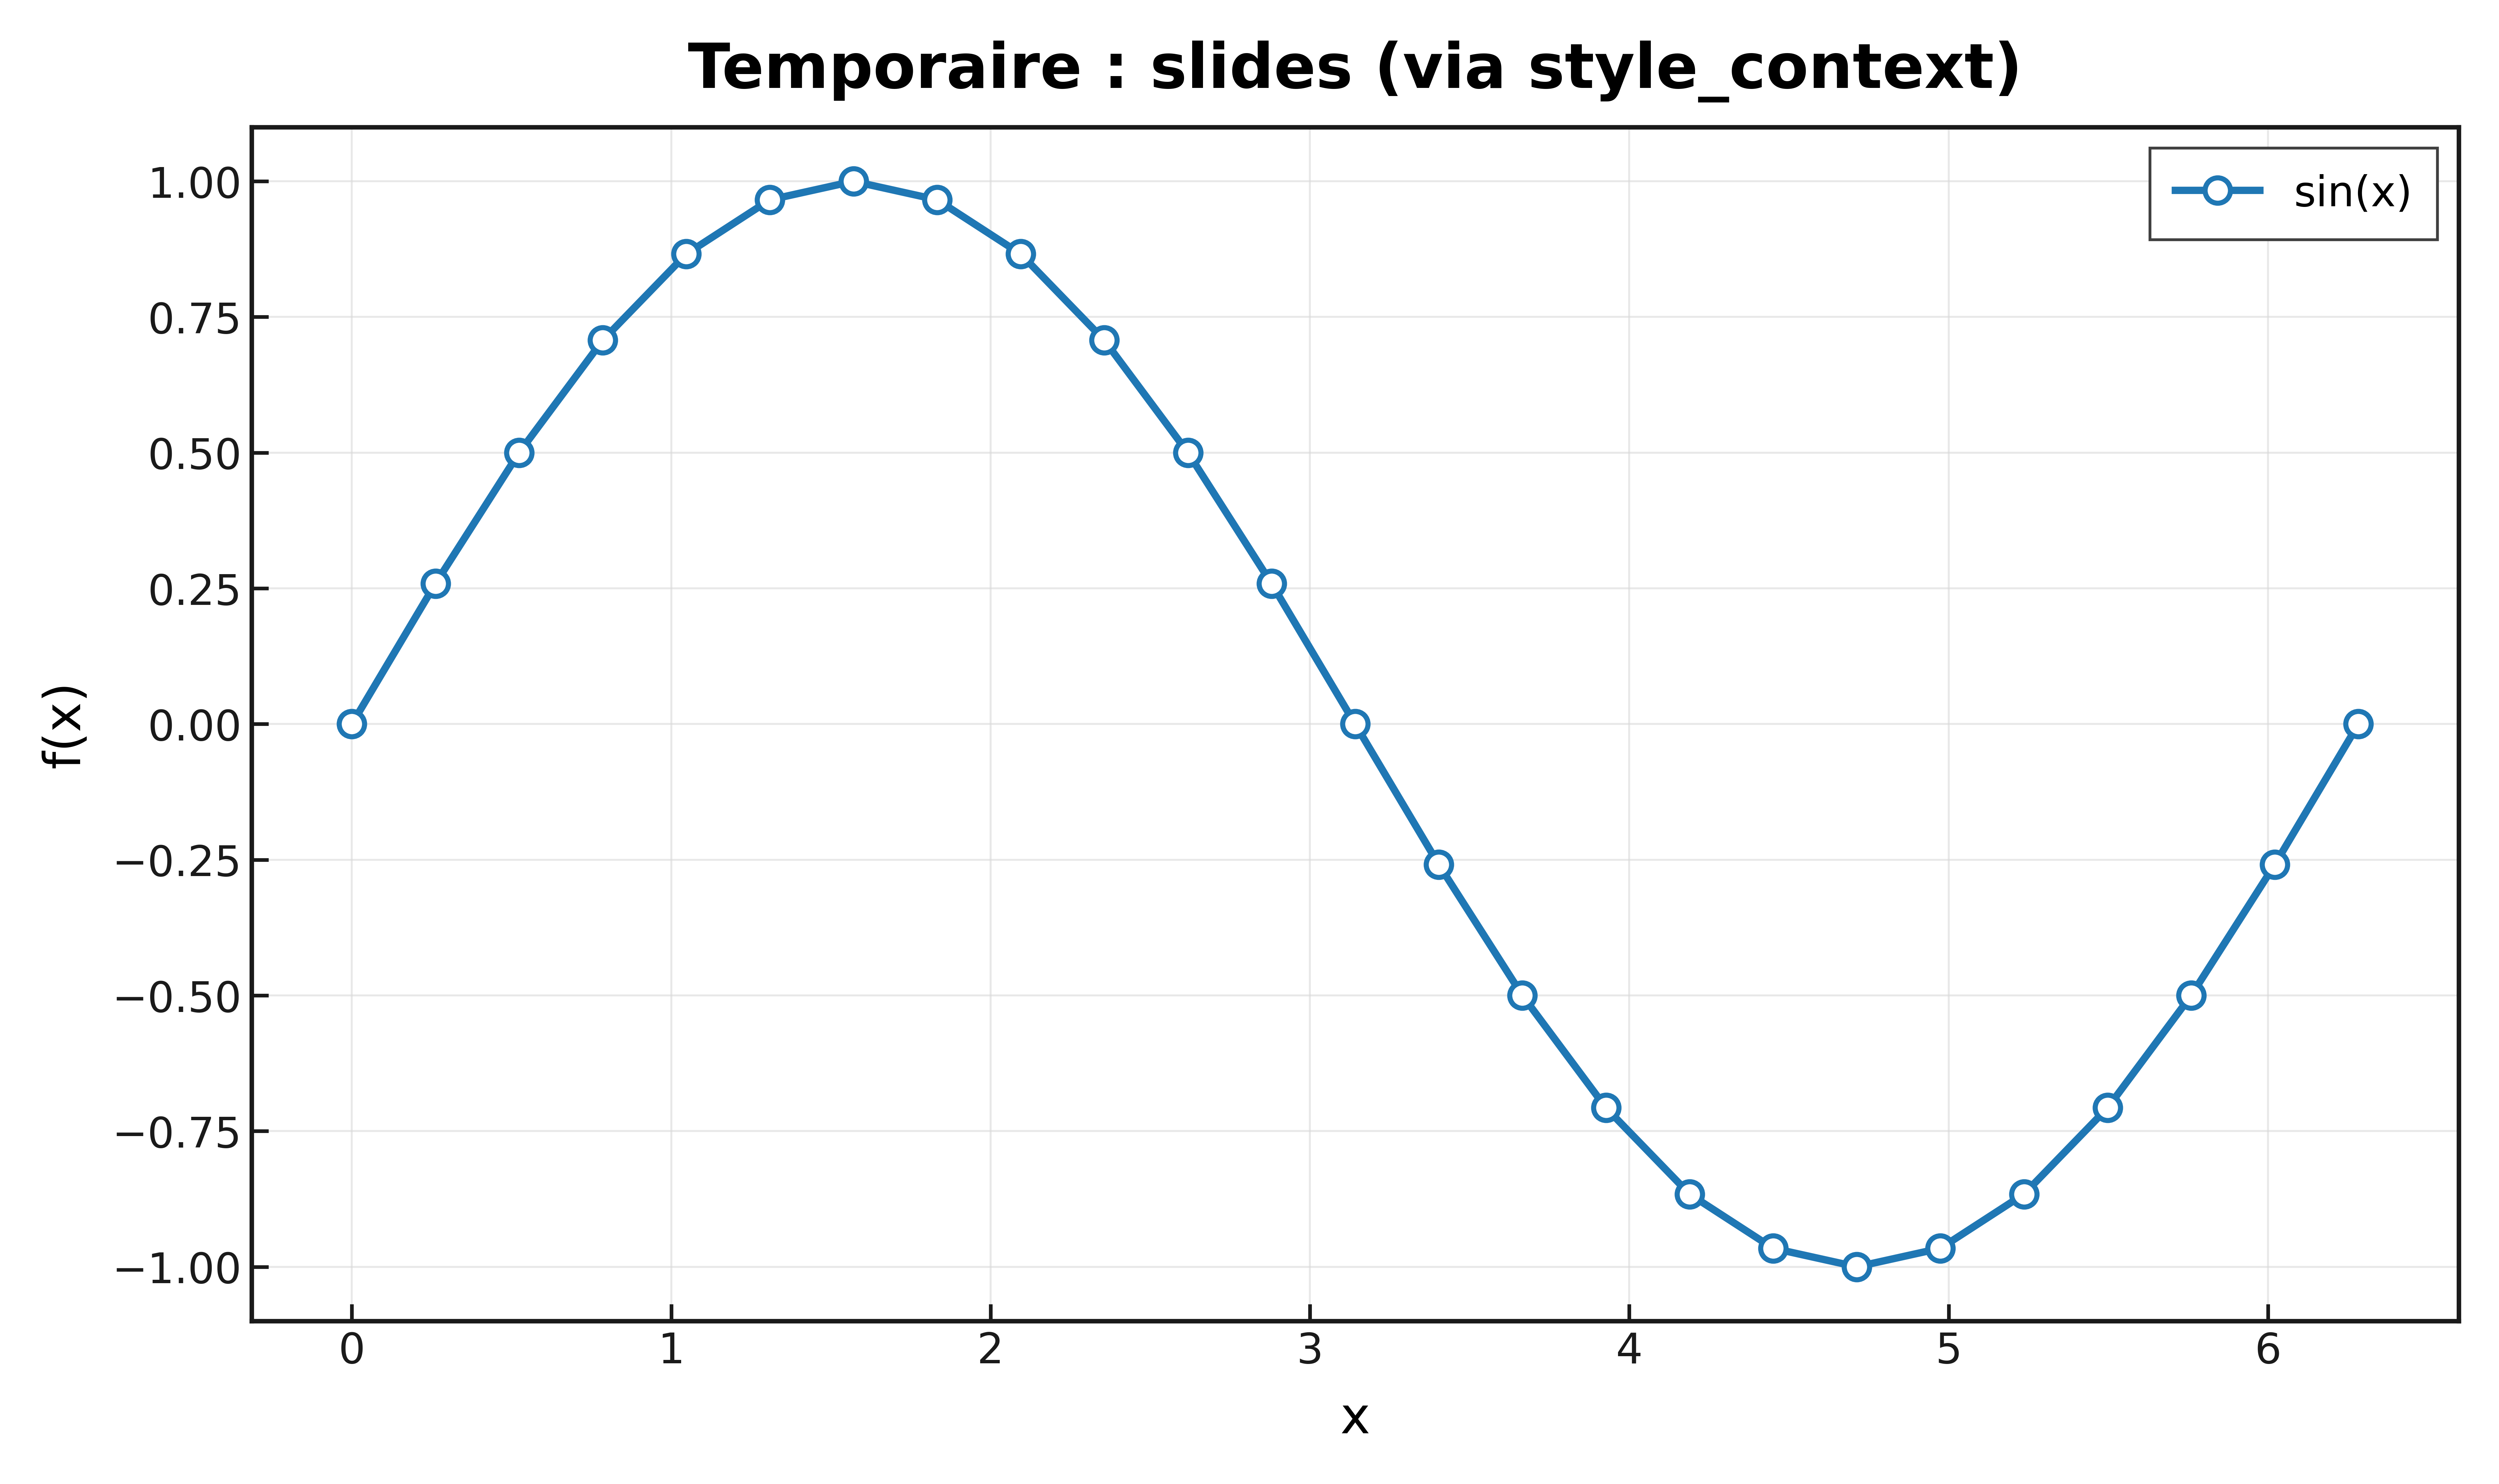

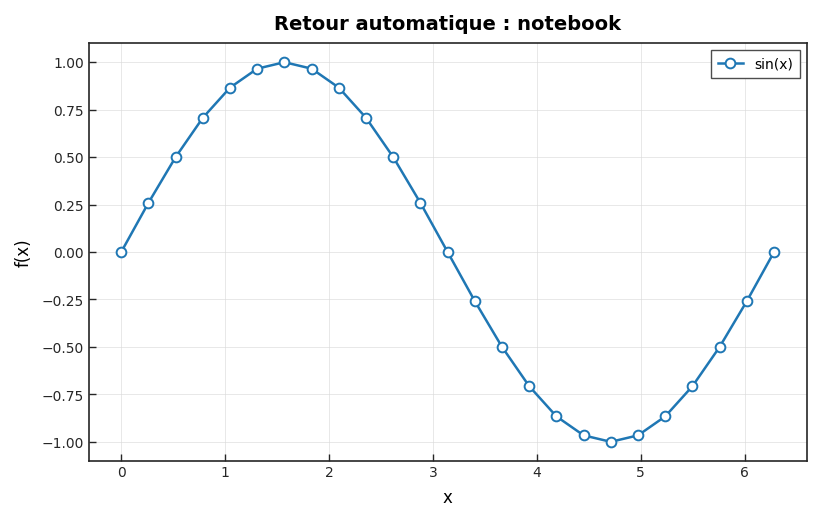

In [40]:
# Profil global = notebook
use_style("notebook")

# --- Figure 1 : style notebook (global) ---
fig1, ax1 = plt.subplots()
plot_line(ax1, x, y_sin, label="sin(x)")
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")
ax1.set_title("Style global : notebook")
ax1.legend()
plt.show()

# --- Figure 2 : style slides (temporaire via context manager) ---
with style_context("slides"):
    fig2, ax2 = plt.subplots()
    plot_line(ax2, x, y_sin, label="sin(x)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("f(x)")
    ax2.set_title("Temporaire : slides (via style_context)")
    ax2.legend()
    plt.show()

# --- Figure 3 : retour automatique au style notebook ---
fig3, ax3 = plt.subplots()
plot_line(ax3, x, y_sin, label="sin(x)")
ax3.set_xlabel("x")
ax3.set_ylabel("f(x)")
ax3.set_title("Retour automatique : notebook")
ax3.legend()
plt.show()

---
## 6. `new_figure` — création avec profil intégré

`new_figure(profile="paper")` est un raccourci pour `plt.subplots()` qui applique le profil automatiquement. On peut aussi passer `figsize` pour surcharger la taille par défaut du profil.

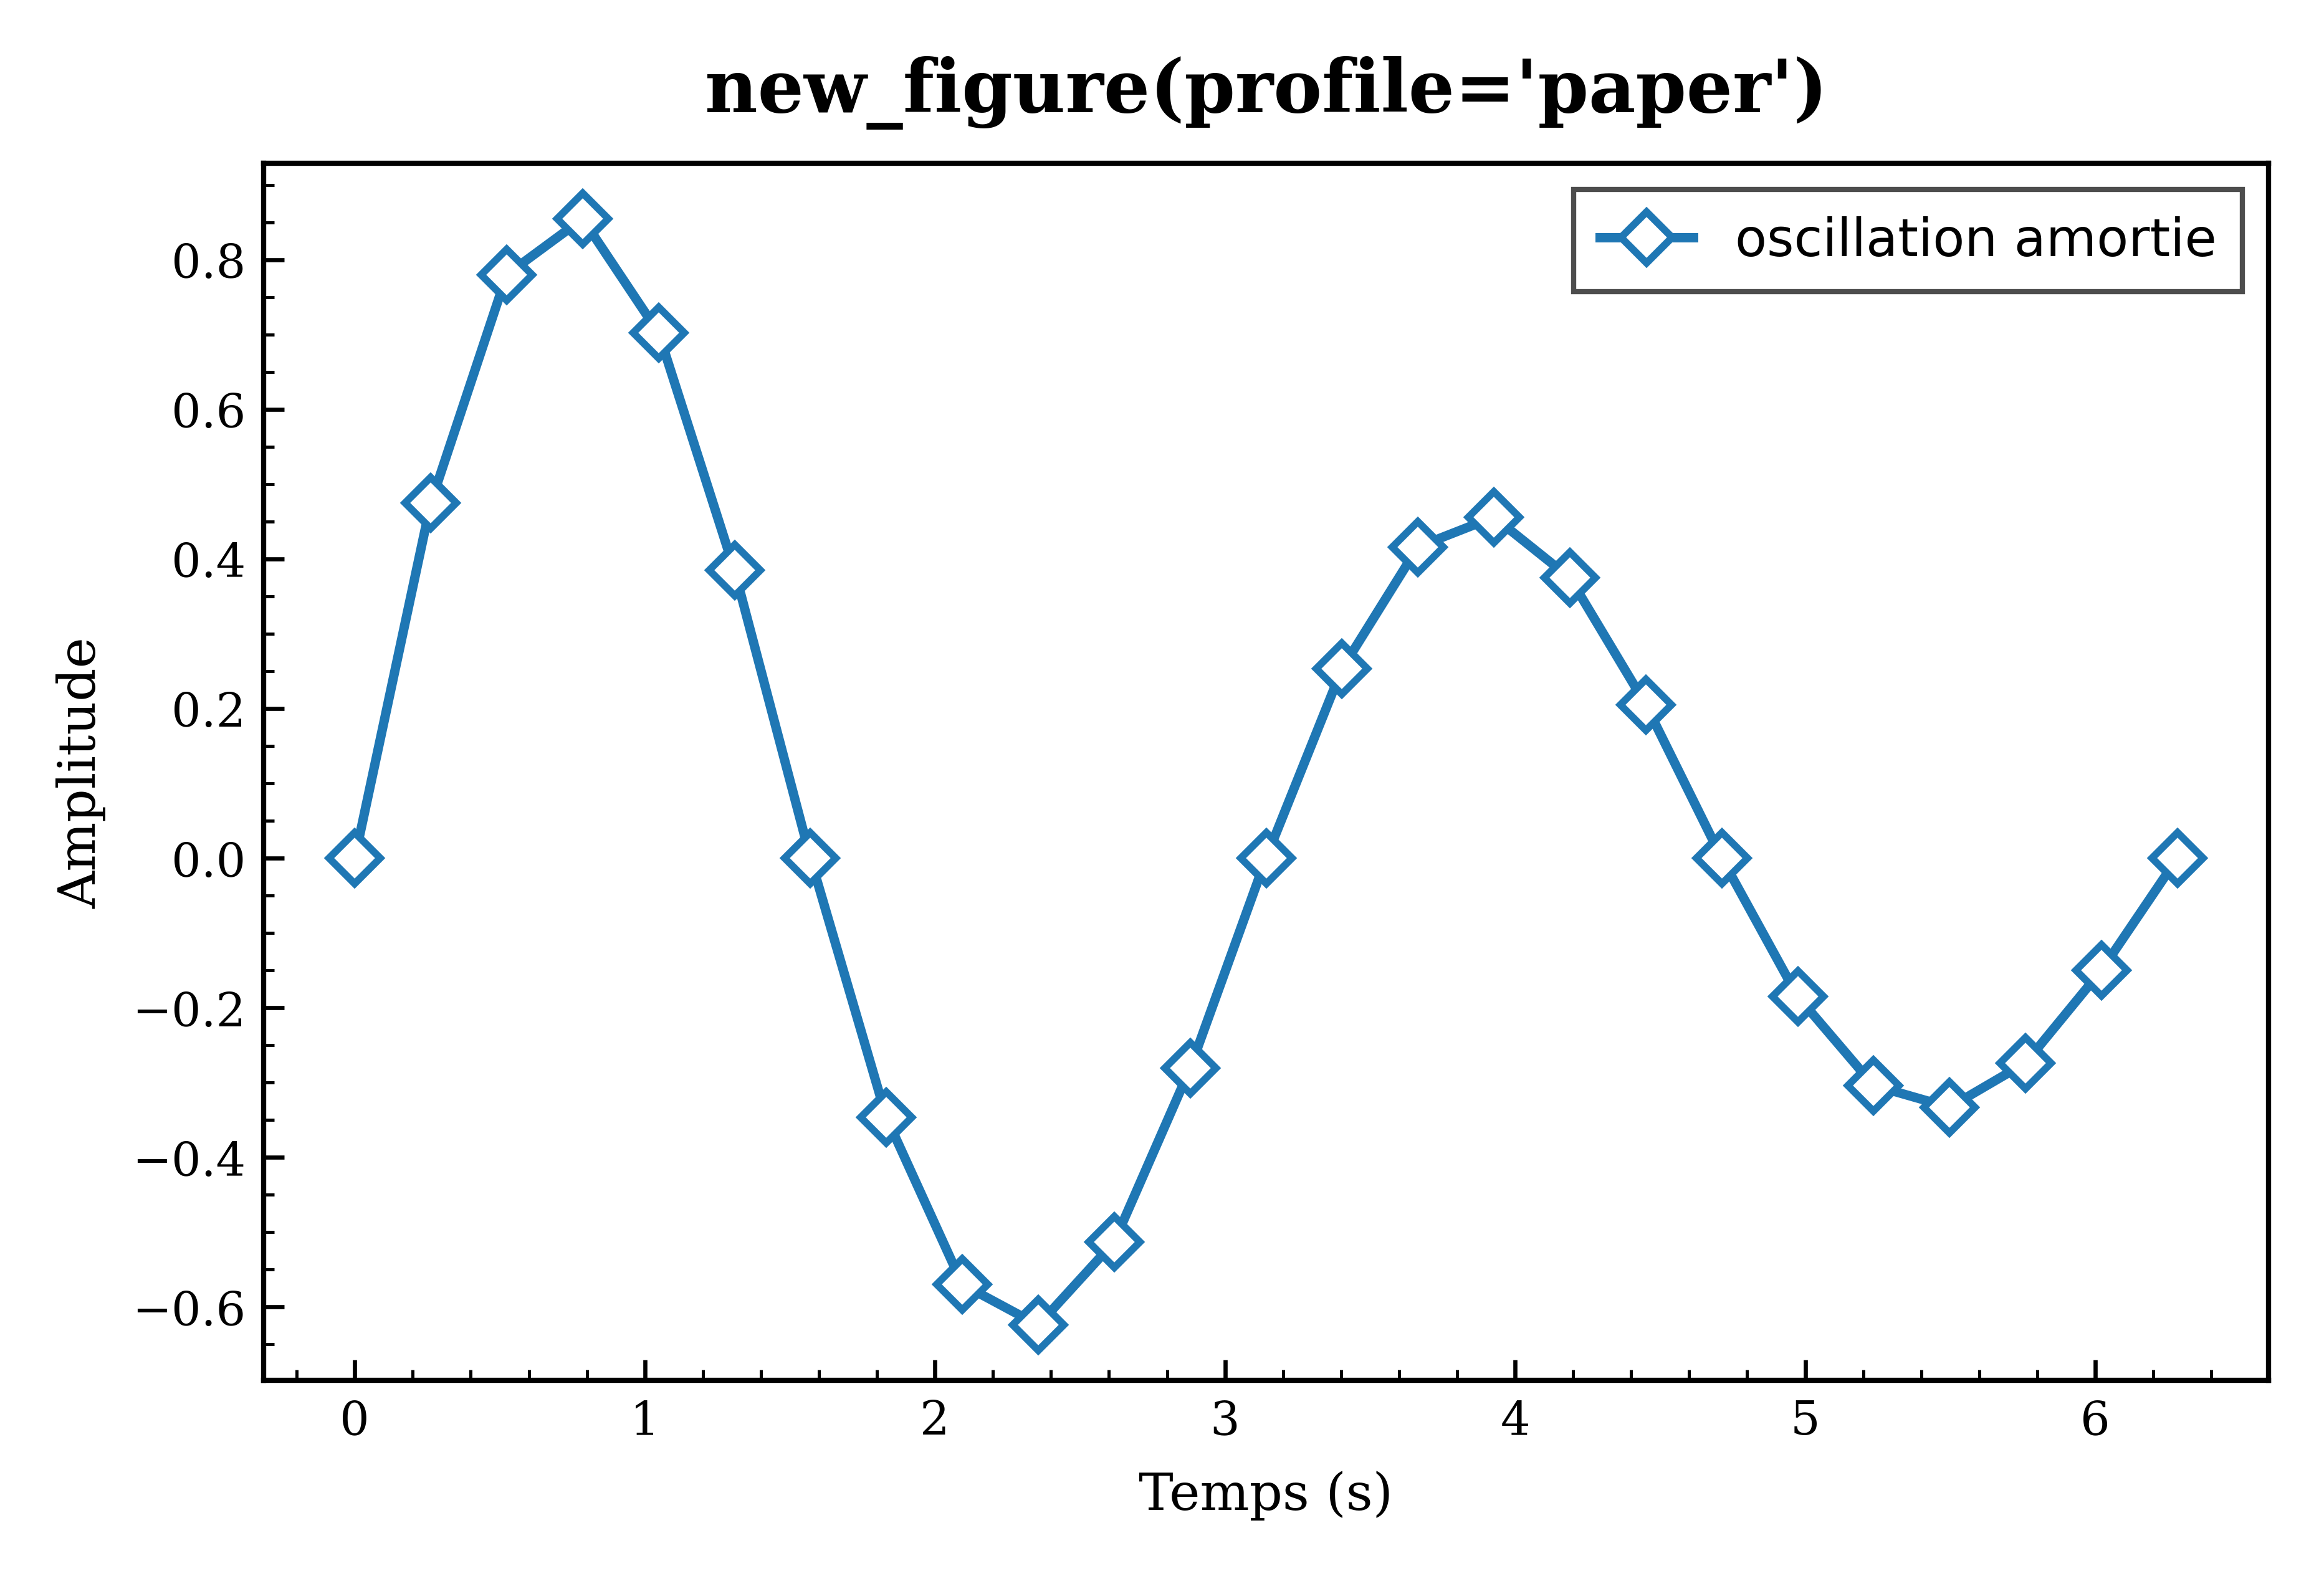

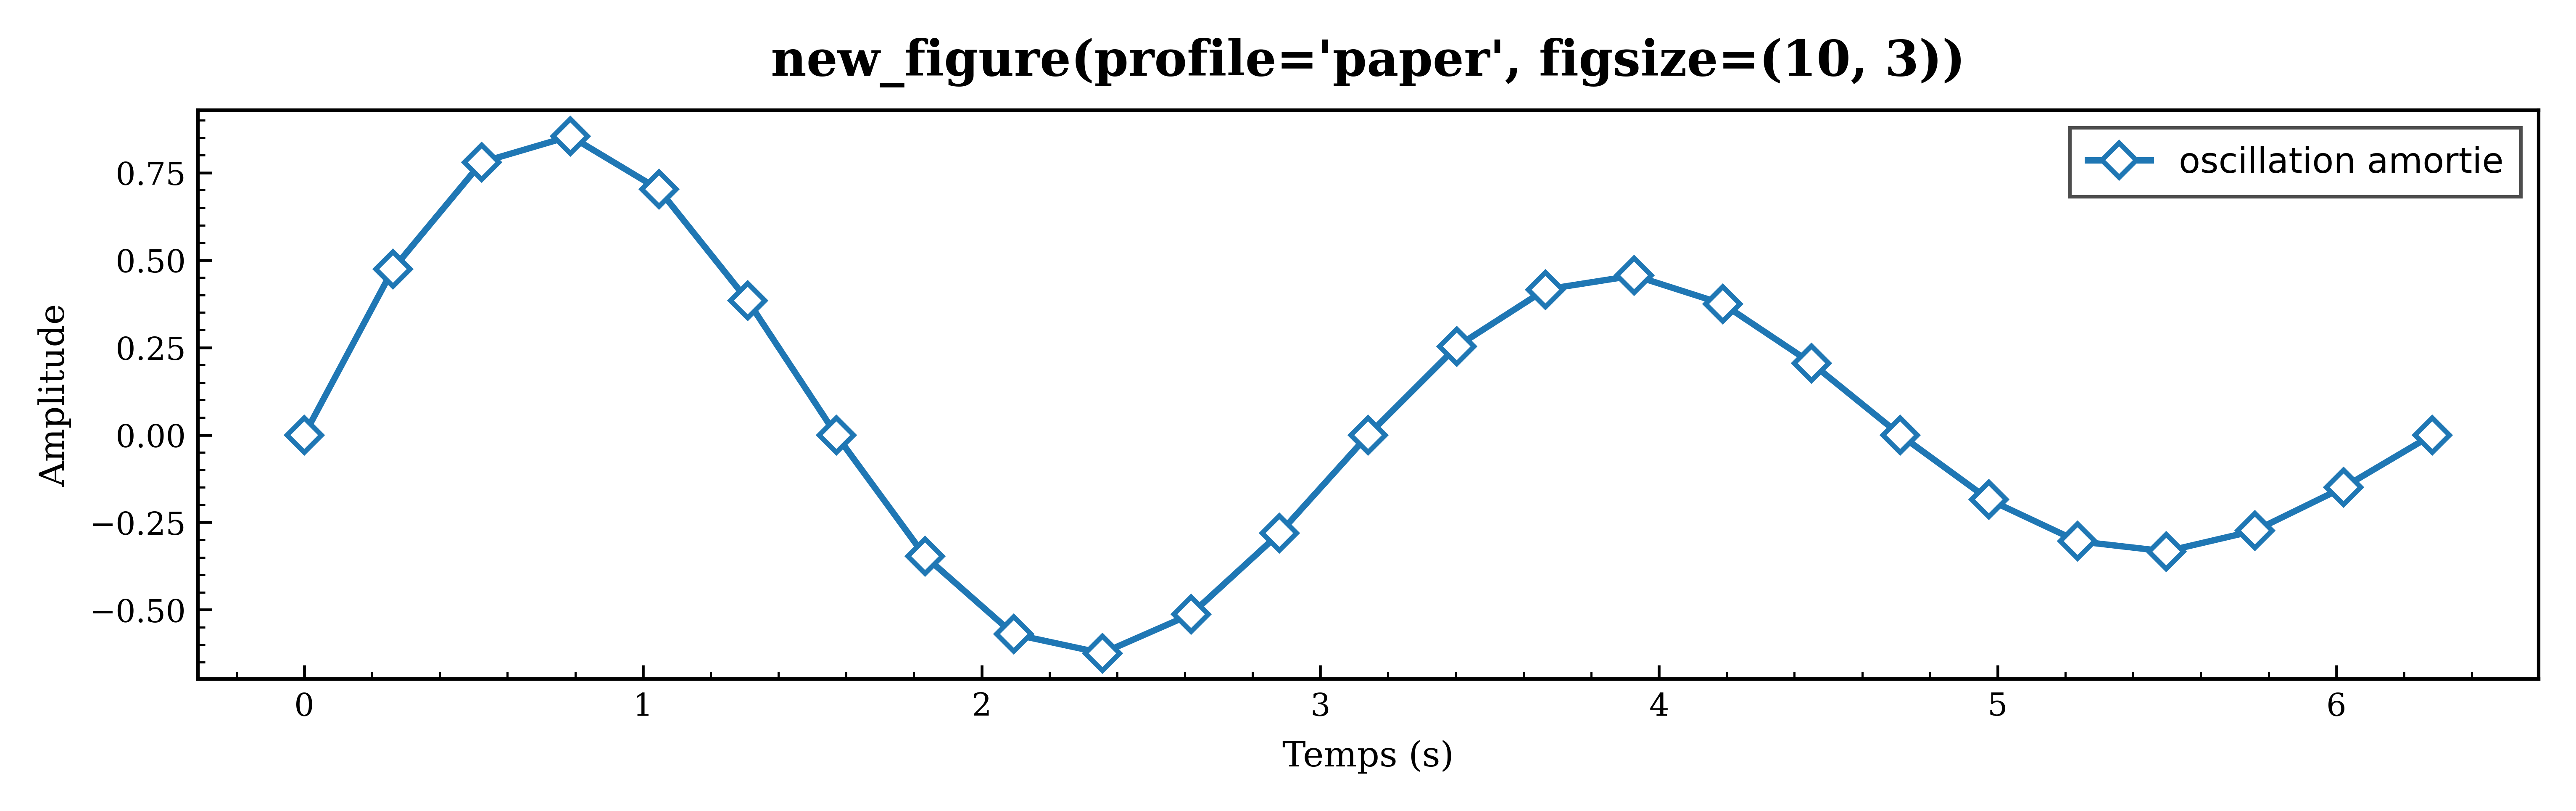

In [41]:
# Création directe avec profil "paper"
fig, ax = new_figure(profile="paper")

plot_line(ax, x, y_damped, marker="D", label="oscillation amortie")
ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude")
ax.set_title("new_figure(profile='paper')")
ax.legend()
plt.show()

# Avec figsize personnalisé
fig, ax = new_figure(profile="paper", figsize=(10, 3))

plot_line(ax, x, y_damped, marker="D", label="oscillation amortie")
ax.set_xlabel("Temps (s)")
ax.set_ylabel("Amplitude")
ax.set_title("new_figure(profile='paper', figsize=(10, 3))")
ax.legend()
plt.show()

---
## 7. Subplots multiples

Le template fonctionne naturellement avec les subplots classiques de Matplotlib.

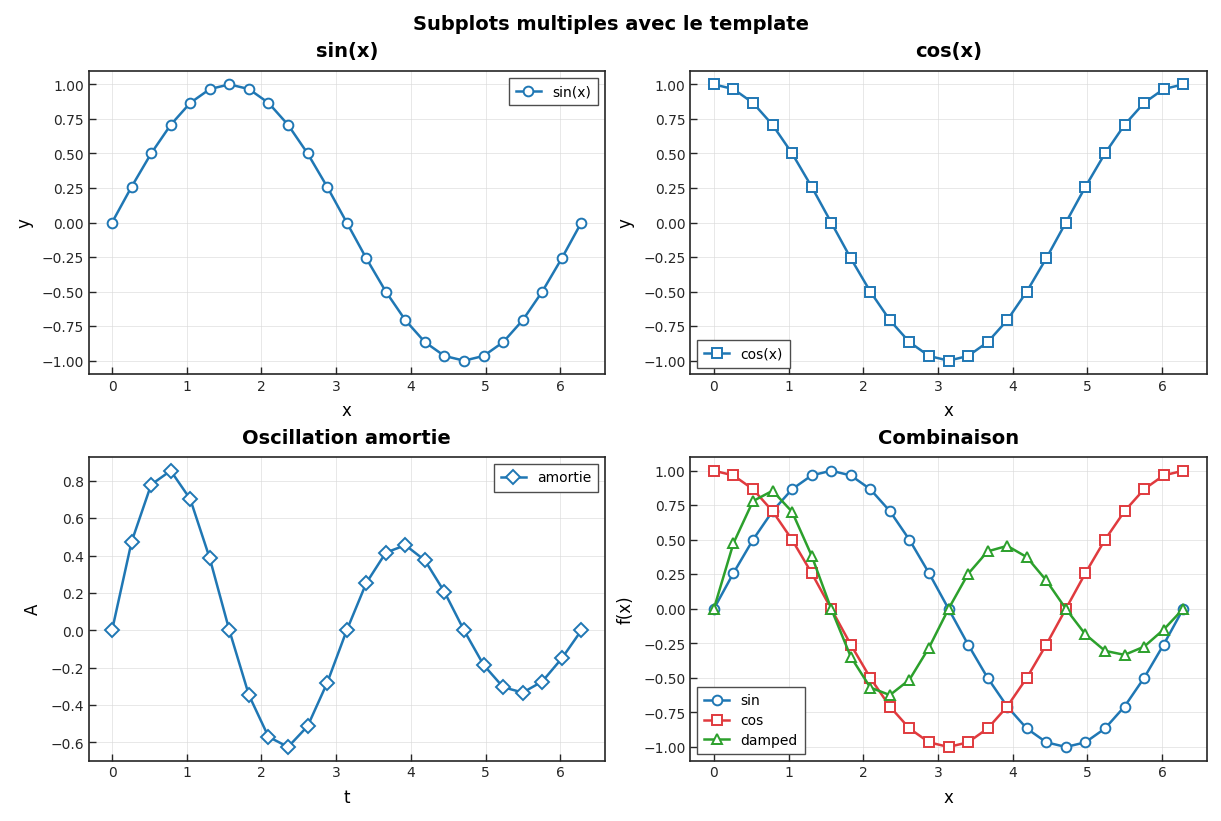

Export subplots OK


In [42]:
use_style("notebook")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subplot (0,0)
plot_line(axes[0, 0], x, y_sin, label="sin(x)")
axes[0, 0].set_title("sin(x)")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].legend()

# Subplot (0,1)
plot_line(axes[0, 1], x, y_cos, marker="s", label="cos(x)")
axes[0, 1].set_title("cos(x)")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].legend()

# Subplot (1,0)
plot_line(axes[1, 0], x, y_damped, marker="D", label="amortie")
axes[1, 0].set_title("Oscillation amortie")
axes[1, 0].set_xlabel("t")
axes[1, 0].set_ylabel("A")
axes[1, 0].legend()

# Subplot (1,1) — combinaison de courbes
plot_line(axes[1, 1], x, y_sin, label="sin")
plot_line(axes[1, 1], x, y_cos, marker="s", label="cos")
plot_line(axes[1, 1], x, y_damped, marker="^", label="damped")
axes[1, 1].set_title("Combinaison")
axes[1, 1].set_xlabel("x")
axes[1, 1].set_ylabel("f(x)")
axes[1, 1].legend()

fig.suptitle("Subplots multiples avec le template", fontweight="bold", fontsize=14)
plt.show()

# Export avec déclassification sur Y
save_figure(fig, "demo_output/subplots_demo", formats=("png",), declassify="y")
print("Export subplots OK")

---
## 8. Export multi-format (PNG + SVG)

On peut exporter en plusieurs formats d'un coup. Si `"emf"` est demandé et qu'Inkscape est installé, la conversion SVG → EMF est automatique.

In [ ]:
use_style("paper")

fig, ax = plt.subplots()
plot_line(ax, x, y_sin, label="sin(x)")
plot_line(ax, x, y_cos, marker="s", label="cos(x)")
ax.set_xlabel("Angle (rad)")
ax.set_ylabel("Amplitude")
ax.set_title("Export multi-format")
ax.legend()

# Export PNG + SVG, avec variante déclassifiée sur X
files = save_figure(
    fig, "demo_output/multi_format",
    formats=("png", "svg", "emf"),
    declassify="x",
)
plt.close(fig)

print("Fichiers générés :")
for f in files:
    print(f"  {f.name:45s}  ({f.stat().st_size / 1024:.1f} kB)")

Fichiers générés :
  multi_format.png                               (142.4 kB)
  multi_format.svg                               (56.1 kB)
  multi_format_declass_x.png                     (145.4 kB)
  multi_format_declass_x.svg                     (51.1 kB)


---
## 9. Cas d'usage réaliste — données CFD

Un exemple plus concret avec des données simulées (profil de pression, coefficient de traînée, etc.).

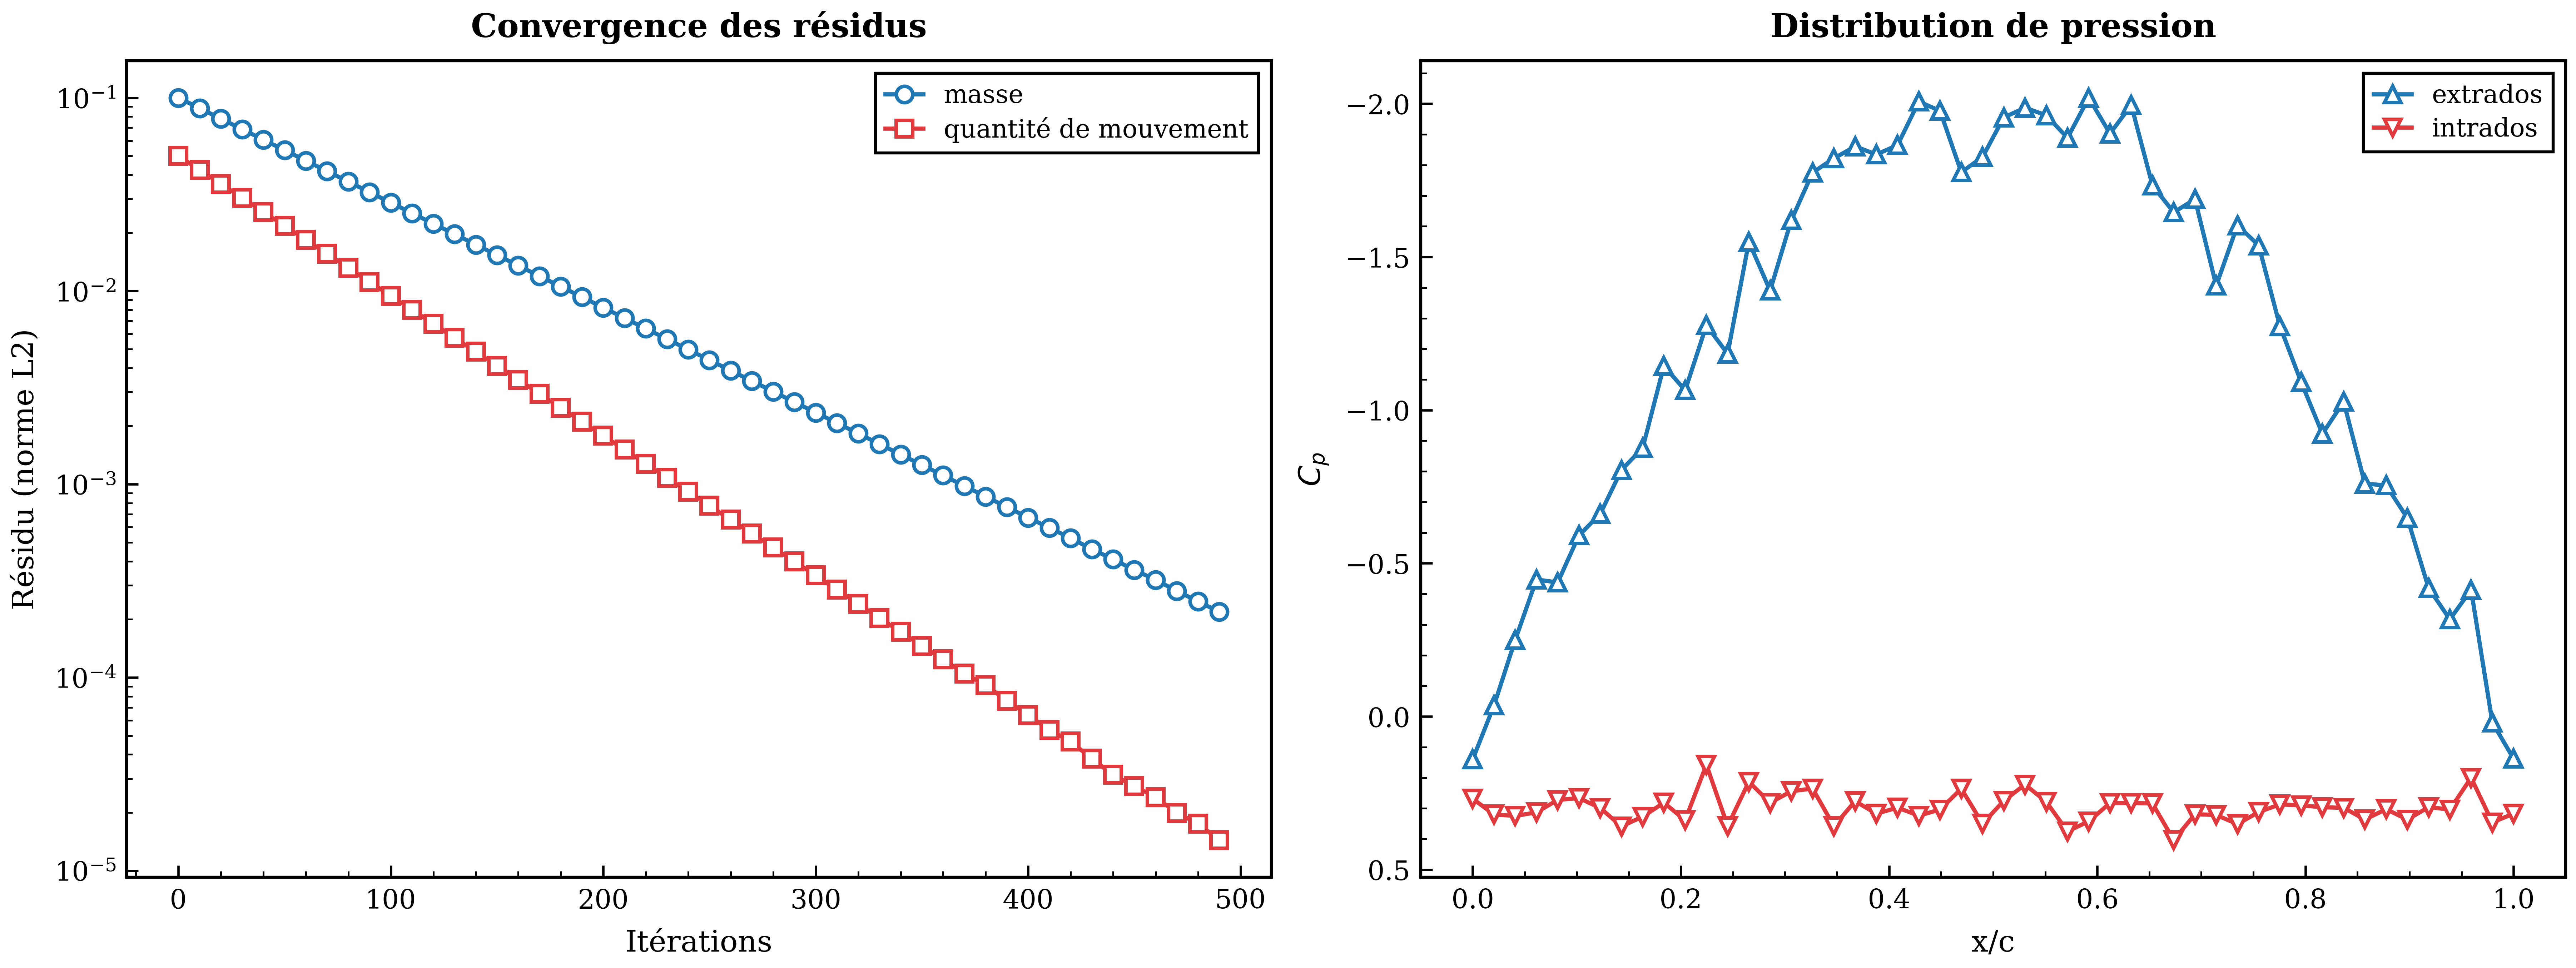

Fichiers CFD exportés :
  cfd_example.png
  cfd_example.svg
  cfd_example_declass_xy.png
  cfd_example_declass_xy.svg


In [31]:
# Données simulées
np.random.seed(42)
iterations = np.arange(0, 500)
residual_mass = 1e-1 * np.exp(-iterations / 80) + 1e-6 * np.random.randn(len(iterations))
residual_momentum = 5e-2 * np.exp(-iterations / 60) + 1e-6 * np.random.randn(len(iterations))

chord = np.linspace(0, 1, 50)
cp_upper = -2.0 * np.sin(np.pi * chord) + 0.1 * np.random.randn(len(chord))
cp_lower = 0.3 * np.ones_like(chord) + 0.05 * np.random.randn(len(chord))

use_style("paper")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))

# --- Convergence des résidus (échelle log) ---
plot_line(ax1, iterations[::10], np.abs(residual_mass[::10]), marker="o", label="masse")
plot_line(ax1, iterations[::10], np.abs(residual_momentum[::10]), marker="s", label="quantité de mouvement")
ax1.set_yscale("log")
ax1.set_xlabel("Itérations")
ax1.set_ylabel("Résidu (norme L2)")
ax1.set_title("Convergence des résidus")
ax1.legend()

# --- Distribution de pression Cp ---
plot_line(ax2, chord, cp_upper, marker="^", label="extrados")
plot_line(ax2, chord, cp_lower, marker="v", label="intrados")
ax2.invert_yaxis()
ax2.set_xlabel("x/c")
ax2.set_ylabel("$C_p$")
ax2.set_title("Distribution de pression")
ax2.legend()

plt.show()

# Export : normal + déclassifié sur les deux axes
files = save_figure(fig, "demo_output/cfd_example", formats=("png", "svg"), declassify="both")
print("Fichiers CFD exportés :")
for f in files:
    print(f"  {f.name}")

---
## Résumé des fonctions

| Fonction | Rôle |
|---|---|
| `use_style("notebook"\|"slides"\|"paper")` | Appliquer un profil globalement |
| `style_context("slides")` | Context manager pour un profil temporaire |
| `new_figure(profile="paper", figsize=...)` | Créer une figure avec profil intégré |
| `plot_line(ax, x, y, marker="o", ...)` | Tracer une courbe avec markers blancs/contour couleur |
| `apply_marker_style(line)` | Restyle un `Line2D` existant |
| `save_figure(fig, path, formats=(...), declassify="x"\|"y"\|"both")` | Export normal + variante déclassifiée |

### Nettoyage des fichiers de démo

Exécuter la cellule suivante pour supprimer le dossier `demo_output/`.

In [32]:
import shutil

if os.path.isdir("demo_output"):
    shutil.rmtree("demo_output")
    print("Dossier demo_output/ supprimé.")
else:
    print("Rien à nettoyer.")

Dossier demo_output/ supprimé.
